In [40]:
%%html
<style type="text/css">
.CodeMirror{
        font-size: 18px;
        line-height: 120%;
}
rendered_html p{
        font-size: 22px;
        text-width: 90%;
        line-height: 125%;
        line-width: 85%;
        text-align: justify;
}
div.text_cell_render rendered_html p{
        font-size: 22px;
        text-width: 90%;
        line-height: 125%;
        line-width: 85%;
        text-align: justify;
}
.body {
        font-size: 24px;
        line-height: 125%;
        line-width: 85%
        text-align: justify;
        width: 100%;
} 
.container{
    line-height: 125%;
    text-width: 80%;
#     text-align: justify;
#     text-justify: inter-word;
    font-size: 20px;
    width: 100%
}
output_subarea output_latex output_result{
    white-space: pre-wrap;
    font-size: 24px;
}
</style> 
<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form align="center" action="javascript:code_toggle()">
    <input type="submit" value="Click here to view formatting HTML.">
</form>

# Imports/Preamble

In [1]:
#----------- Plot Formatting ---------#
import matplotlib_inline.backend_inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize']   = (8.5, 8.5)
plt.rcParams['lines.markersize'] = 4
plt.rcParams['font.size']        = 16
plt.rcParams['text.usetex']      = True
plt.rcParams['font.family']      = 'serif'
# plt.rcParams['font.serif']       = 'Times'
%matplotlib inline

# Best Answers for All Values of p

In [2]:
layers_data = pd.read_csv('QAOA-Measurement-Probabilities-All-Layers.csv', index_col=0)

In [3]:
layers_data

,p Layers,Squared Overlap
0,1,0.046181
1,2,0.036178
2,3,0.047152
3,4,0.055307
4,5,0.058082
5,6,0.054549
6,7,0.049385
7,8,0.046293
8,9,0.085665
9,10,0.104349


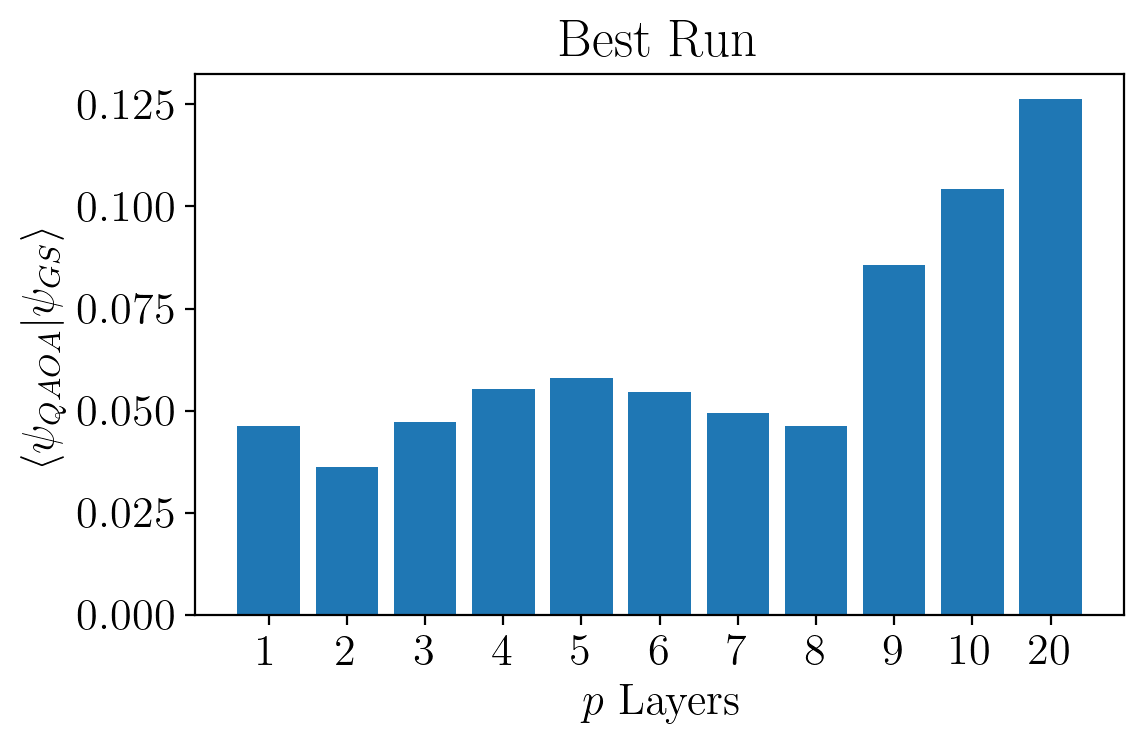

In [4]:
plt.figure(figsize=(6, 4))
# Use the indices as x-values to avoid weird spacing
idz = np.asarray(range(11))
xvalz = layers_data['p Layers'].values
overlaps = layers_data['Squared Overlap']
plt.bar(idz, overlaps)
plt.xticks(idz, xvalz)
plt.ylabel(r'$\left\langle \psi_{QAOA} | \psi_{GS} \right\rangle$')
plt.xlabel(r'$p$ Layers')
plt.title('Best Run')
plt.tight_layout()

# Measurement Probabilities for p = 20

In [5]:
plot_data = pd.read_csv('QAOA-P20-MeasurementProbabilities.csv', index_col=0)

In [6]:
plot_data

,Bitstring,Squared Overlap
0,$\left| 0000000 \right\rangle$,0.000212
1,$\left| 0000001 \right\rangle$,0.009721
2,$\left| 0000010 \right\rangle$,0.001371
3,$\left| 0000011 \right\rangle$,0.010764
4,$\left| 0000100 \right\rangle$,0.001493
...,...,...
123,$\left| 1111011 \right\rangle$,0.000170
124,$\left| 1111100 \right\rangle$,0.000580
125,$\left| 1111101 \right\rangle$,0.000069
126,$\left| 1111110 \right\rangle$,0.000117


In [7]:
overlaps_squared = plot_data['Squared Overlap'].values

In [8]:
# Set some minimum threshold for values to plot (it gets cluttered with all 128 bitstrings in the x-axis)
minimum_threshold = 0.005625
keep_idz = np.where(abs(overlaps_squared) > minimum_threshold)[0]
x_labels = plot_data['Bitstring'].values

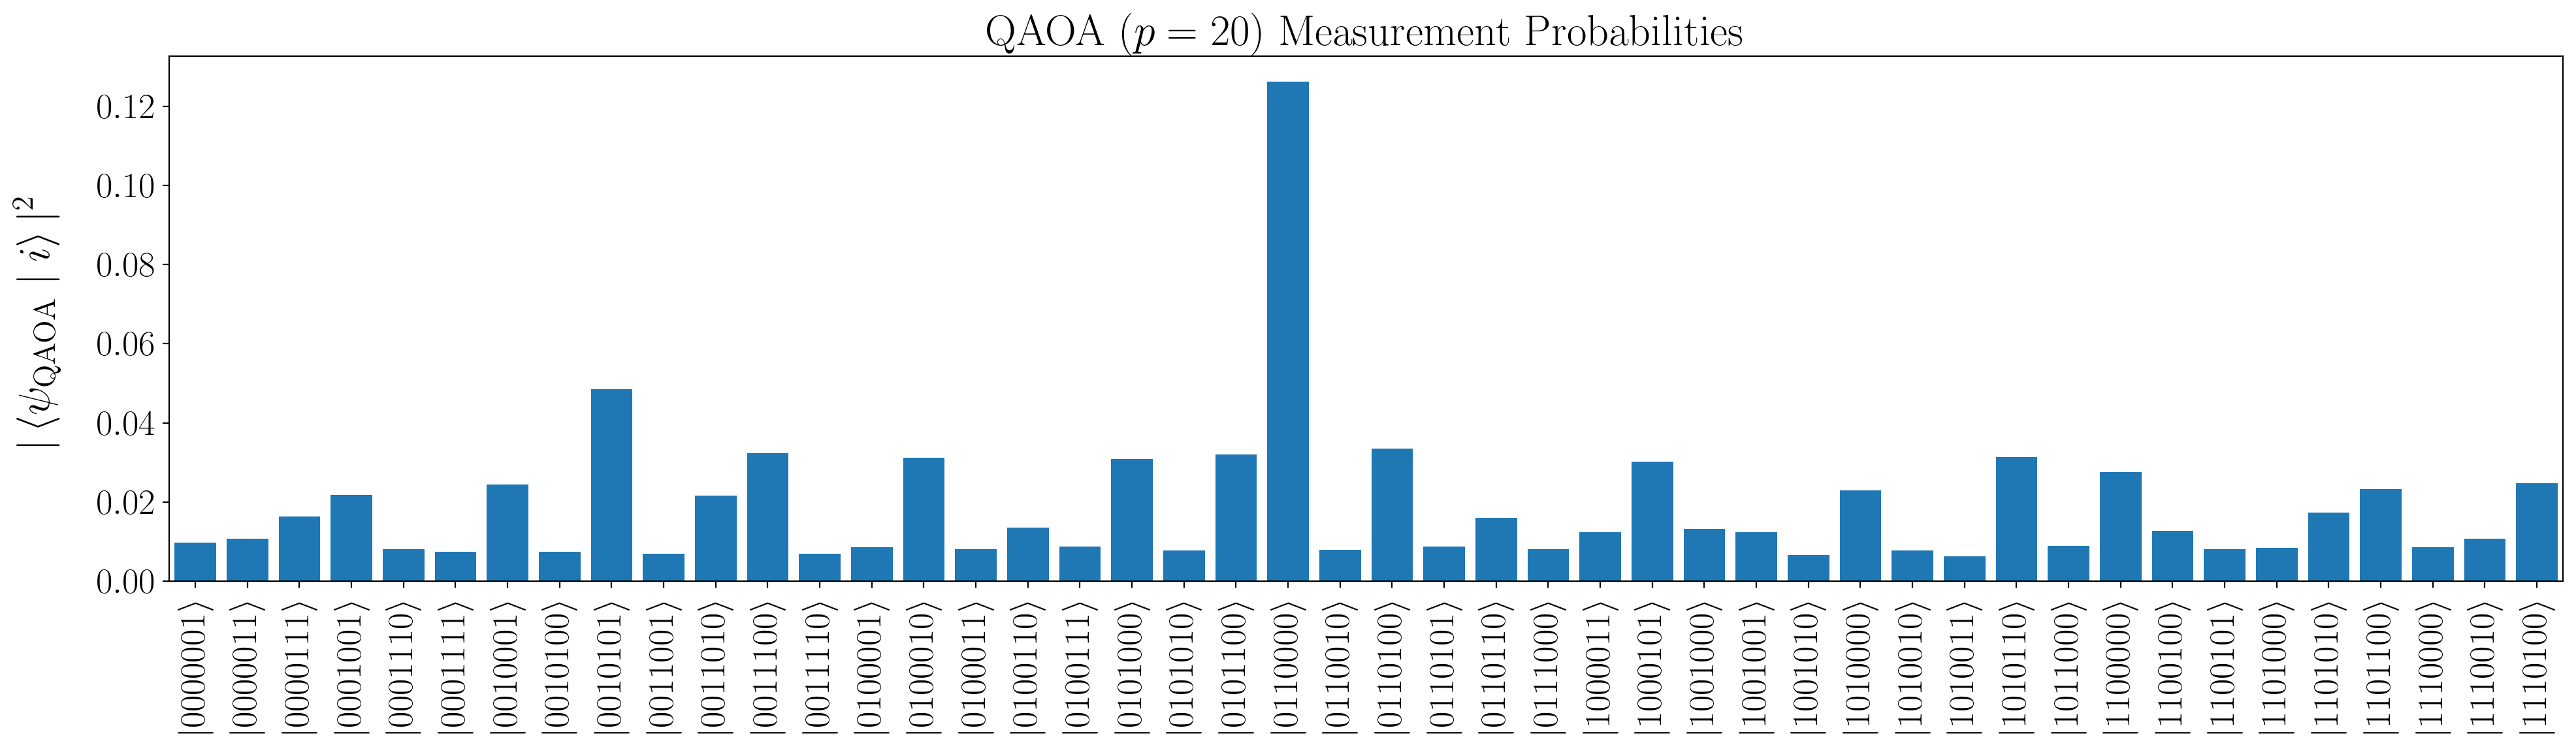

In [9]:
plt.figure(figsize=(20, 6))
x_placeholder = np.asarray([ii for ii in range(0, len(keep_idz))])
plt.bar(x_placeholder, overlaps_squared[keep_idz])
plt.xlim(-0.5, x_placeholder[-1]+0.5)
plt.ylabel(r'$| \left\langle \psi_{\mathrm{QAOA}} \mid i \right\rangle |^{2}$', size=24, labelpad=20)
__ = plt.xticks(x_placeholder, labels=x_labels[keep_idz], rotation=90, size=20)
plt.yticks(size=20)
plt.title('QAOA ($p=20$) Measurement Probabilities', size=24)
plt.tight_layout()